## Check GPU detected or not.

In [1]:
import torch
print(torch.__version__)  # Should print PyTorch version
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.get_device_name(0))  # Should show NVIDIA RTX 3050

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
2.5.1+cu121
True
NVIDIA GeForce RTX 3050


## Train License Plate Detection Model using YOLOv11

In [2]:
from ultralytics import YOLO
import torch

# Ensure CUDA is used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")  # Should print "cuda"

# Load YOLO model onto GPU
model = YOLO("yolo11n.pt").to(device)

# Train the model on GPU
results = model.train(data="Plate_Detection_Dataset\\data.yaml", epochs=100, imgsz=640, device=device)

Using device: cuda
New https://pypi.org/project/ultralytics/8.3.109 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=Plate_Detection_Dataset\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\Plate_Detection_Dataset\train\labels... 13588 images, 18 backgrounds, 0 corrupt:  73%|███████▎  | 13588/18528 [00:09<00:03, 1437.52it/s]


KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe


In [2]:
model = YOLO("C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\runs\\detect\\train3\\weights\\best.pt")
metrics = model.val(data="LP_Detection_Dataset/data.yaml")  # Returns a dictionary of metrics

print(metrics)  # Optional to inspect in code

Ultralytics 8.3.99  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning C:\Users\ADMIN\Desktop\Project_ANPR\LP_Detection_Dataset\labels\val.cache... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:06<00:00, 10.97it/s]


                   all       1073       1573      0.859        0.8      0.847      0.472
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BA960FB850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

# Test best.pt (model) on an image.

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe

0: 416x640 15 license_plates, 46.2ms
Speed: 3.9ms preprocess, 46.2ms inference, 129.4ms postprocess per image at shape (1, 3, 416, 640)


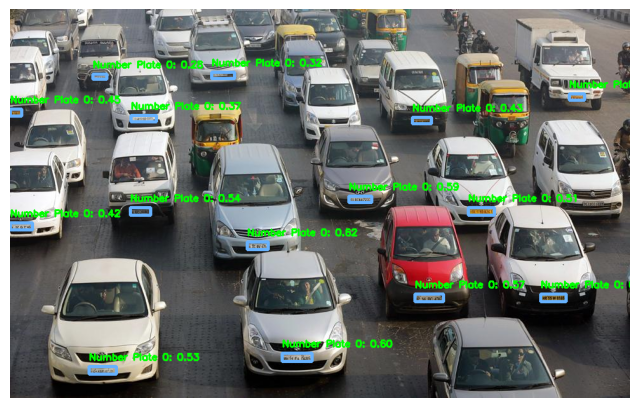

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained YOLOv11 model
model = YOLO("runs\\detect\\train\\weights\\License_Plate_Detection_Model.pt")  # Update with the correct path


# Load an image
image_path = "Test_images\\image_6.jpg"  # Update with the correct path
image = cv2.imread(image_path)

# Run inference
results = model(image)

# Display results
for result in results:
    boxes = result.boxes.xyxy  # Bounding boxes in (x1, y1, x2, y2) format
    confidences = result.boxes.conf  # Confidence scores
    class_ids = result.boxes.cls  # Class IDs

    # Draw bounding boxes on the image
    for box, conf, cls in zip(boxes, confidences, class_ids):
        x1, y1, x2, y2 = map(int, box)
        label = f"Number Plate {int(cls)}: {conf:.2f}"
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 178, 102), 3)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR to RGB for correct visualization in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


# Test best.pt (model) on an video.

In [ ]:
from ultralytics import YOLO
import cv2

# Load your trained YOLOv11 model
model = YOLO("runs\\detect\\train\\weights\\License_Plate_Detection_Model.pt")  # Update with the correct path

# Load a video
video_path = "Test_video\\Traffic Control CCTV.mp4"  # Update with the correct path
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output_video.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Run inference
    results = model(frame)
    
    for result in results:
        boxes = result.boxes.xyxy  # Bounding boxes in (x1, y1, x2, y2) format
        confidences = result.boxes.conf  # Confidence scores
        class_ids = result.boxes.cls  # Class IDs

        # Draw bounding boxes on the frame
        for box, conf, cls in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = map(int, box)
            label = f"Number Plate {int(cls)}: {conf:.2f}"
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 178, 102), 3)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 3)
    
    # Write the frame to output video
    out.write(frame)
    
    # Display the frame
    cv2.imshow('License Plate Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 3 license_plates, 47.9ms
Speed: 3.1ms preprocess, 47.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 5.3ms
Speed: 1.8ms preprocess, 5.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 4.8ms
Speed: 1.7ms preprocess, 4.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 4.7ms
Speed: 1.7ms preprocess, 4.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 4.9ms
Speed: 1.5ms preprocess, 4.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 4.7ms
Speed: 1.5ms preprocess, 4.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 license_plates, 5.1ms
Speed: 1.5ms preprocess, 5.1ms inferen